<a href="https://colab.research.google.com/github/asab77/MAT-422/blob/main/Homework4_1_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# \section*{4.2.1 Graph Definitions and Basic Concepts}

A graph is a collection of nodes (or vertices) connected by edges. A graph $ G $ can be represented mathematically as $ G = (V, E) $, where:

\begin{itemize}
    \item $ V $ is the set of vertices (nodes),
    \item $ E $ is the set of edges connecting pairs of vertices.
\end{itemize}

Two common methods for representing a graph in programming are:
\begin{itemize}
    \item \textbf{Adjacency List:} Each node is associated with a list of nodes it is connected to. This representation is efficient for sparse graphs.
    \item \textbf{Adjacency Matrix:} A matrix where each cell $ (i, j) $ indicates the presence or absence of an edge between nodes $ i $ and $ j $. This representation is useful for dense graphs.
\end{itemize}

In this section, we demonstrate these graph representations in Python using an example.

In [1]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

# Define a simple graph using adjacency list
graph_adj_list = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

# Display the adjacency list
print("Adjacency List Representation:")
for node, edges in graph_adj_list.items():
    print(f"{node}: {edges}")

# Define the same graph using an adjacency matrix
import numpy as np

nodes = ['A', 'B', 'C', 'D', 'E', 'F']
adj_matrix = np.array([
    [0, 1, 1, 0, 0, 0],
    [1, 0, 0, 1, 1, 0],
    [1, 0, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1],
    [0, 0, 1, 0, 1, 0]
])

print("\nAdjacency Matrix Representation:")
print(adj_matrix)


Adjacency List Representation:
A: ['B', 'C']
B: ['A', 'D', 'E']
C: ['A', 'F']
D: ['B']
E: ['B', 'F']
F: ['C', 'E']

Adjacency Matrix Representation:
[[0 1 1 0 0 0]
 [1 0 0 1 1 0]
 [1 0 0 0 0 1]
 [0 1 0 0 0 0]
 [0 1 0 0 0 1]
 [0 0 1 0 1 0]]


\section*{4.2.2 Graph Creation and Visualization}

Visualizing a graph provides insight into its structure, such as the arrangement of nodes and edges. We can use the NetworkX library in Python to create and visualize graphs easily.

A simple graph visualization includes:
\begin{itemize}
    \item Nodes represented as points or circles,
    \item Edges represented as lines connecting the nodes.
\end{itemize}

In this section, we create a basic graph and use NetworkX to visualize it, displaying the connections among nodes.


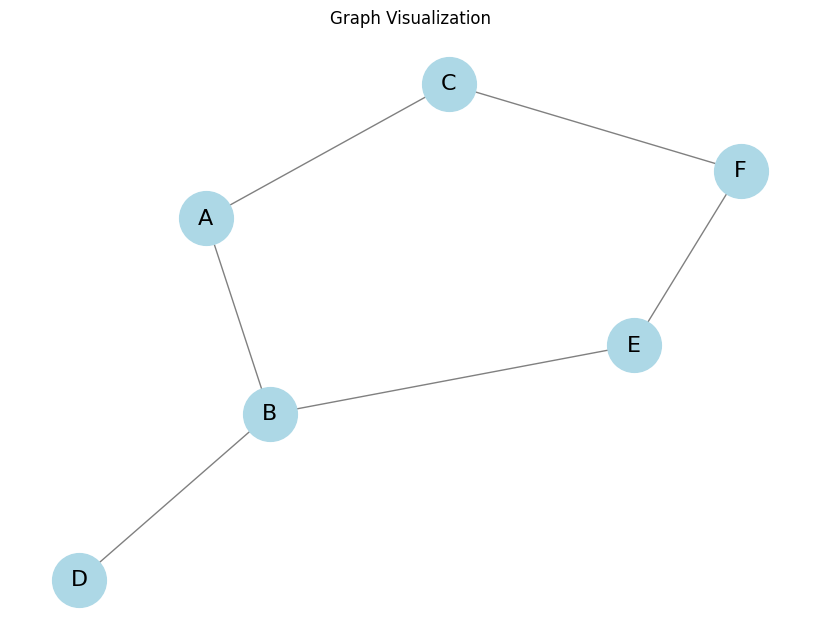

In [2]:
# Create a graph using NetworkX
G = nx.Graph()

# Add nodes and edges
G.add_edges_from([
    ('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'),
    ('C', 'F'), ('E', 'F')
])

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=16)
plt.title("Graph Visualization")
plt.show()


\section*{4.2.3 Basic Graph Algorithms}

Graph traversal algorithms allow us to explore the nodes and edges of a graph systematically. Two fundamental traversal methods are:
\begin{itemize}
    \item \textbf{Breadth-First Search (BFS):} Explores nodes level by level, starting from a source node and visiting all its neighbors before moving to the next level.
    \item \textbf{Depth-First Search (DFS):} Explores as far down a branch as possible before backtracking, often implemented recursively.
\end{itemize}

Both BFS and DFS can be used to find paths, check connectivity, and solve many graph-related problems. In this section, we implement BFS and DFS for graph traversal and demonstrate their use.


In [3]:
# Breadth-First Search (BFS)
def bfs(graph, start):
    visited = []
    queue = [start]

    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)
            queue.extend([n for n in graph_adj_list[node] if n not in visited])
    return visited

# Depth-First Search (DFS)
def dfs(graph, start, visited=None):
    if visited is None:
        visited = []
    visited.append(start)
    for next_node in graph_adj_list[start]:
        if next_node not in visited:
            dfs(graph, next_node, visited)
    return visited

# Run BFS and DFS
print("BFS Traversal from node 'A':", bfs(graph_adj_list, 'A'))
print("DFS Traversal from node 'A':", dfs(graph_adj_list, 'A'))


BFS Traversal from node 'A': ['A', 'B', 'C', 'D', 'E', 'F']
DFS Traversal from node 'A': ['A', 'B', 'D', 'E', 'F', 'C']


\section*{4.2.4 Applications of Graph Modeling}

Graph modeling is applied in various fields, such as network analysis, social media, and route planning. One common application is finding the shortest path between two nodes, which has applications in network routing and navigation.

In this section, we demonstrate the shortest path problem using NetworkX. The algorithm finds the minimum path between a starting node and a target node, showing how graph models can represent and solve real-world problems.


Shortest path from A to F: ['A', 'C', 'F']


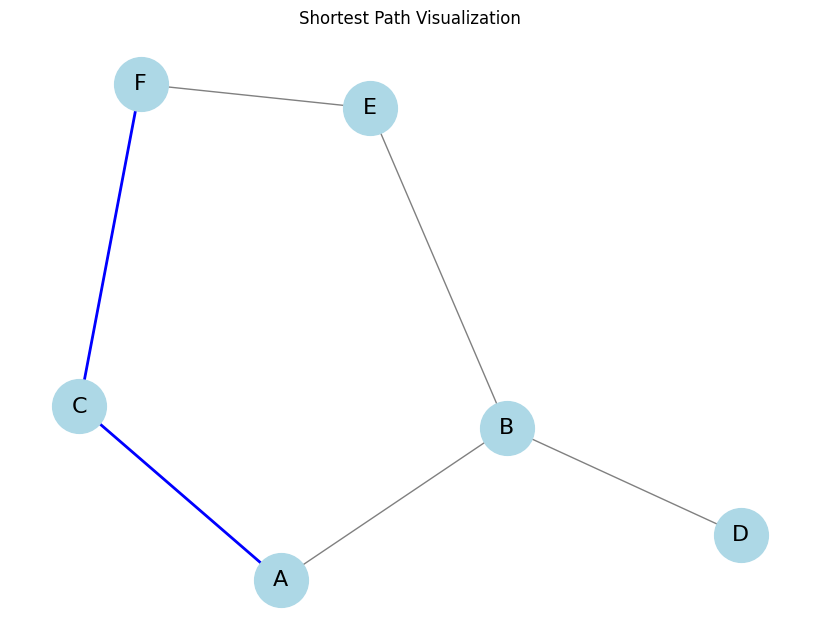

In [4]:
# Finding the shortest path using Dijkstra's algorithm
start_node = 'A'
end_node = 'F'
shortest_path = nx.shortest_path(G, source=start_node, target=end_node)
print(f"Shortest path from {start_node} to {end_node}:", shortest_path)

# Visualize the shortest path in the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=16)
path_edges = list(zip(shortest_path, shortest_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2)
plt.title("Shortest Path Visualization")
plt.show()
